# **Diplomado IA: Aplicaciones 1 - NLP**. <br> Práctico 1: Introducción a NLP
---
---

**Profesores:**
- Carlos Aspillaga
- Pablo Messina

**Ayudante:**
- Gabriel Faundez
---
---

# **Instrucciones Generales**

El siguiente práctico se debe realizar **individualmente**. El formato de entrega es el **archivo .ipynb con todas las celdas ejecutadas**. Todas las preguntas deben ser respondidas en las celdas dispuestas para ello. No se aceptará el _output_ de una celda de código como respuesta.

**Nombre alumno:** ARIEL CARVAJAL

El siguiente práctico cuenta con varias secciones y en varias de ellas se incluye actividades a realizar.

**IMPORTANTE: habrá un bonus de 1 décima para todos aquellos alumnos/as que muestren buen orden en sus respuestas (esto aplica a legibilidad de código, buena redacción, formalidad, organización del jupyter notebook, seguimiento de instrucciones, etc). El criterio lo pondrá cada ayudante corrector. La nota máxima obtenible en el laboratorio es 7.0**

# **Índice**

>[Diplomado IA: Aplicaciones 1 - NLP.  Práctico 1: Introducción a NLP](#scrollTo=tHopPtVaNF1K)

>[Instrucciones Generales](#scrollTo=D4--58EgLXxI)

>[Índice](#scrollTo=jCb8075QLdVx)

>[Herramientas para manejo de texto](#scrollTo=-YWyqn8m9ry5)

>>[Uso de NLTK](#scrollTo=QowbUszVAyrv)

>>[Uso de spaCy](#scrollTo=R94k5U1h99jc)

>>[Actividades](#scrollTo=QiOarh-8d81k)

>[Traducción automática usando MarianMT](#scrollTo=XmRz5CaMDuNJ)

>>[Uso básico](#scrollTo=MDjXqJlBFevt)

>[Análisis de sentimientos usando VADER](#scrollTo=toQRjUMuBULL)

>>[Uso básico](#scrollTo=SRfSvpjXFBBb)

>>[Actividad](#scrollTo=M73Ouu71ExZv)

>[Bag of Words / Bag of N-grams](#scrollTo=Oxm40vFjHiOk)

>>[Actividades](#scrollTo=rKftFZ2W4XKJ)



# **Herramientas para manejo de texto**

## **Uso de NLTK**

Primero importemos y descarguemos las componentes que usaremos

In [1]:
import scipy
import nltk
nltk.download('gutenberg')
nltk.download('genesis')
nltk.download('inaugural')
nltk.download('nps_chat')
nltk.download('webtext')
nltk.download('treebank')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.book import *

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package genesis to /root/nltk_data...
[nltk_data]   Unzipping corpora/genesis.zip.
[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Unzipping corpora/inaugural.zip.
[nltk_data] Downloading package nps_chat to /root/nltk_data...
[nltk_data]   Unzipping corpora/nps_chat.zip.
[nltk_data] Downloading package webtext to /root/nltk_data...
[nltk_data]   Unzipping corpora/webtext.zip.
[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk

El código anterior, entre otras cosas, descarga 9 textos de muestra:

* **text1**: Moby Dick by Herman Melville 1851
* **text2**: Sense and Sensibility by Jane Austen 1811
* **text3**: The Book of Genesis
* **text4**: Inaugural Address Corpus
* **text5**: Chat Corpus
* **text6**: Monty Python and the Holy Grail
* **text7**: Wall Street Journal
* **text8**: Personals Corpus
* **text9**: The Man Who Was Thursday by G . K . Chesterton 1908

Cada uno de esos textos es un objeto de NLTK de tipo "Text", que implementa diversas funcionalidades útiles para visualización.
Para crear tu propio objeto tipo "Text" basta con crearlo a partir de cualquier texto tokenizado. A continuación un ejemplo tomado de la página de Wikipedia de Cristóbal Colón

In [2]:
columbus_tokenized = ['Christopher', 'Columbus', '(', 'between', '25', 'August', 'and', '31', 'October', '1451', '–', '20', 'May', '1506', ')', 'was', 'an', 'Italian', 'explorer', 'and', 'navigator', 'who', 'completed', 'four', 'voyages', 'across', 'the', 'Atlantic', 'Ocean', ',', 'opening', 'the', 'way', 'for', 'European', 'exploration', 'and', 'colonization', 'of', 'the', 'Americas', '.', 'His', 'expeditions', ',', 'sponsored', 'by', 'the', 'Catholic', 'Monarchs', 'of', 'Spain', ',', 'were', 'the', 'first', 'European', 'contact', 'with', 'the', 'Caribbean', ',', 'Central', 'America', ',', 'and', 'South', 'America', '.', 'Scholars', 'generally', 'agree', 'that', 'Columbus', 'was', 'born', 'in', 'the', 'Republic', 'of', 'Genoa', 'and', 'spoke', 'a', 'dialect', 'of', 'Ligurian', 'as', 'his', 'first', 'language', '.', 'He', 'went', 'to', 'sea', 'at', 'a', 'young', 'age', 'and', 'travelled', 'widely', ',', 'as', 'far', 'north', 'as', 'the', 'British', 'Isles', 'and', 'as', 'far', 'south', 'as', 'what', 'is', 'now', 'Ghana', '.', 'He', 'married', 'Portuguese', 'noblewoman', 'Filipa', 'Moniz', 'Perestrelo', 'and', 'was', 'based', 'in', 'Lisbon', 'for', 'several', 'years', ',', 'but', 'later', 'took', 'a', 'Castilian', 'mistress', ';', 'he', 'had', 'one', 'son', 'with', 'each', 'woman', '.', 'Though', 'largely', 'self-educated', ',', 'Columbus', 'was', 'widely', 'read', 'in', 'geography', ',', 'astronomy', ',', 'and', 'history', '.', 'He', 'formulated', 'a', 'plan', 'to', 'seek', 'a', 'western', 'sea', 'passage', 'to', 'the', 'East', 'Indies', ',', 'hoping', 'to', 'profit', 'from', 'the', 'lucrative', 'spice', 'trade', '.', 'Following', 'Columbus', "'s", 'persistent', 'lobbying', 'to', 'multiple', 'kingdoms', ',', 'Catholic', 'Monarchs', 'Queen', 'Isabella', 'I', 'and', 'King', 'Ferdinand', 'II', 'agreed', 'to', 'sponsor', 'a', 'journey', 'west', '.', 'Columbus', 'left', 'Castile', 'in', 'August', '1492', 'with', 'three', 'ships', ',', 'and', 'made', 'landfall', 'in', 'the', 'Americas', 'on', '12', 'October', '(', 'ending', 'the', 'period', 'of', 'human', 'habitation', 'in', 'the', 'Americas', 'now', 'referred', 'to', 'as', 'the', 'pre-Columbian', 'era', ')', '.', 'His', 'landing', 'place', 'was', 'an', 'island', 'in', 'the', 'Bahamas', ',', 'known', 'by', 'its', 'native', 'inhabitants', 'as', 'Guanahani', ';', 'its', 'exact', 'location', 'is', 'uncertain', '.', 'Columbus', 'subsequently', 'visited', 'the', 'islands', 'now', 'known', 'as', 'Cuba', 'and', 'Hispaniola', ',', 'establishing', 'a', 'colony', 'in', 'what', 'is', 'now', 'Haiti', ':', 'the', 'first', 'European', 'settlement', 'in', 'the', 'Americas', 'since', 'the', 'Norse', 'colonies', 'nearly', '500', 'years', 'earlier', '.', 'He', 'arrived', 'back', 'in', 'Castile', 'in', 'early', '1493', ',', 'bringing', 'a', 'number', 'of', 'captive', 'natives', 'with', 'him', '.', 'Word', 'of', 'his', 'voyages', 'soon', 'spread', 'throughout', 'Europe', '.', 'Columbus', 'made', 'three', 'further', 'voyages', 'to', 'the', 'New', 'World', ',', 'exploring', 'the', 'Lesser', 'Antilles', 'in', '1493', ',', 'Trinidad', 'and', 'the', 'northern', 'coast', 'of', 'South', 'America', 'in', '1498', ',', 'and', 'the', 'eastern', 'coast', 'of', 'Central', 'America', 'in', '1502', '.', 'Many', 'of', 'the', 'names', 'he', 'gave', 'to', 'geographical', 'features—particularly', 'islands—are', 'still', 'in', 'use', '.', 'He', 'continued', 'to', 'seek', 'a', 'passage', 'to', 'the', 'East', 'Indies', ',', 'and', 'the', 'extent', 'to', 'which', 'he', 'was', 'aware', 'that', 'the', 'Americas', 'were', 'a', 'wholly', 'separate', 'landmass', 'is', 'uncertain', '.', 'He', 'never', 'clearly', 'renounced', 'his', 'belief', 'that', 'he', 'had', 'reached', 'the', 'Far', 'East', 'and', 'gave', 'the', 'name', 'indios', '(', '``', 'Indians', "''", ')', 'to', 'the', 'indigenous', 'peoples', 'he', 'encountered', '.', 'As', 'a', 'colonial', 'governor', ',', 'Columbus', 'was', 'accused', 'by', 'his', 'contemporaries', 'of', 'significant', 'brutality', 'and', 'was', 'soon', 'removed', 'from', 'the', 'post', '.', 'Columbus', "'s", 'strained', 'relationship', 'with', 'the', 'Crown', 'of', 'Castile', 'and', 'its', 'appointed', 'colonial', 'administrators', 'in', 'America', 'led', 'to', 'his', 'arrest', 'and', 'removal', 'from', 'Hispaniola', 'in', '1500', ',', 'and', 'later', 'to', 'protracted', 'litigation', 'over', 'the', 'benefits', 'that', 'he', 'and', 'his', 'heirs', 'claimed', 'were', 'owed', 'to', 'them', 'by', 'the', 'crown', '.', 'Columbus', "'s", 'expeditions', 'inaugurated', 'a', 'period', 'of', 'exploration', ',', 'conquest', ',', 'and', 'colonization', 'that', 'lasted', 'for', 'centuries', ',', 'helping', 'create', 'the', 'modern', 'Western', 'world', '.', 'The', 'transfers', 'between', 'the', 'Old', 'World', 'and', 'New', 'World', 'that', 'followed', 'his', 'first', 'voyage', 'are', 'known', 'as', 'the', 'Columbian', 'exchange', '.', 'Columbus', 'was', 'widely', 'venerated', 'in', 'the', 'centuries', 'after', 'his', 'death', ',', 'but', 'public', 'perception', 'has', 'fractured', 'in', 'recent', 'decades', 'as', 'scholars', 'give', 'greater', 'attention', 'to', 'the', 'harm', 'committed', 'under', 'his', 'governance', ',', 'particularly', 'the', 'near-extermination', 'of', 'Hispaniola', "'s", 'indigenous', 'Taíno', 'population', 'from', 'mistreatment', 'and', 'European', 'diseases', ',', 'as', 'well', 'as', 'their', 'enslavement', '.', 'Proponents', 'of', 'the', 'Black', 'Legend', 'theory', 'of', 'history', 'claim', 'that', 'Columbus', 'has', 'been', 'unfairly', 'maligned', 'as', 'part', 'of', 'a', 'wider', 'anti-Catholic', 'sentiment', '.', 'Many', 'landmarks', 'and', 'institutions', 'in', 'the', 'Western', 'Hemisphere', 'bear', 'his', 'name', ',', 'including', 'the', 'country', 'of', 'Colombia', '.']

text10 = nltk.Text(columbus_tokenized)

Mediante el método "concordance" podemos encontrar y visualizar fácilmente menciones de alguna palabra en particular

In [3]:
print(text1)
print('')
text1.concordance("Whales", width=80, lines=20)

<Text: Moby Dick by Herman Melville 1851>

Displaying 20 of 268 matches:
king up whatever random allusions to whales he could anyways find in any book wh
! EXTRACTS . " And God created great whales ." -- GENESIS . " Leviathan maketh a
st fishes that are : among which the Whales and Whirlpooles called Balaene , tak
ea , when about sunrise a great many Whales and other monsters of the sea , appe
also with a view of catching horse - whales , which had bones of very great valu
ught some to the king . ... The best whales were catched in his own country , of
" -- THE FAERIE QUEEN . " Immense as whales , the motion of whose vast bodies ca
 out a sea ." -- IBID . " The mighty whales which swim in a sea of water , and h
RCHAS . " In their way they saw many whales sporting in the ocean , and in wanto
 " Here they saw such huge troops of whales , that they were forced to proceed w
A . D . 1671 HARRIS COLL . " Several whales have come in upon this coast ( Fife 
AS . PHIL . TRANS . A . D . 1668 . "

Mediante el método "dispersion_plot" podemos observar la distribución de ocurrencias de las palabras

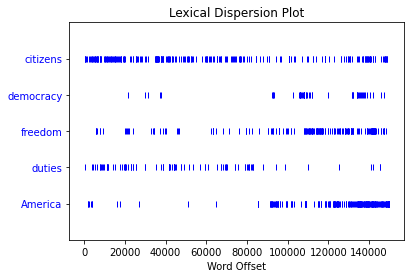

In [4]:
text4.dispersion_plot(["citizens", "democracy", "freedom", "duties", "America"])

Mediante el uso de "FreqDist" podemos estudiar la frecuencia de las palabras, o incluso graficarlas.
El gráfico nos muestra que a pesar de ser un texto corto, se cumple la ley de Zipf 

In [50]:
fdist1 = FreqDist(text1)
vocabulary1 = fdist1.keys()
fdist1['of']

6536

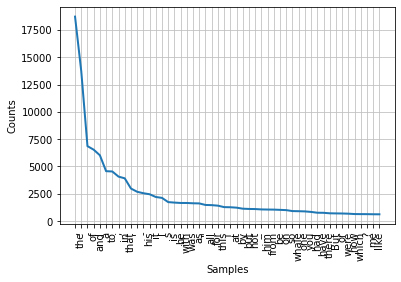

In [49]:
fdist1.plot(50)

Solo a modo de verificación, podemos hacer lo mismo para observar la ley de Heaps en el texto Moby Dick

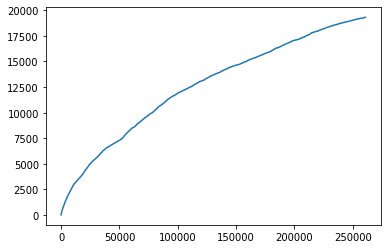

In [7]:
x = []
y = []

words = set()
for i, word in enumerate(text1.tokens):
    words.add(word)
    x.append(i+1)
    y.append(len(words))

import matplotlib.pyplot as plt
plot = plt.plot(x,y)

NLTK trae implementadas funcionalidades para dividir un string de texto en oraciones o en palabras. Incluso trae funcionalidades para tokenizar tweets.

In [8]:
from nltk.tokenize import sent_tokenize, TweetTokenizer
s = "this is a sentence. This is another sentence. Mr. President said something. U.S.A. means United States of America"
sent_tokenize(s)

['this is a sentence.',
 'This is another sentence.',
 'Mr. President said something.',
 'U.S.A. means United States of America']

In [9]:
s = "Esta es una oración. Esta es otra oración. El Sr. presidente dijo algo. U.S.A. significa United States of America"
sent_tokenize(s)

['Esta es una oración.',
 'Esta es otra oración.',
 'El Sr. presidente dijo algo.',
 'U.S.A. significa United States of America']

In [10]:
sentence = """Such an analysis can reveal features that are not easily visible from the variations in the individual genes"""
tokens = nltk.word_tokenize(sentence)
tokens

['Such',
 'an',
 'analysis',
 'can',
 'reveal',
 'features',
 'that',
 'are',
 'not',
 'easily',
 'visible',
 'from',
 'the',
 'variations',
 'in',
 'the',
 'individual',
 'genes']

In [11]:
tknzr = TweetTokenizer()
s = "This is a cooool #dummysmiley: :-) :-P <3 and some arrows < > -> <--"
tknzr.tokenize(s)

['This',
 'is',
 'a',
 'cooool',
 '#dummysmiley',
 ':',
 ':-)',
 ':-P',
 '<3',
 'and',
 'some',
 'arrows',
 '<',
 '>',
 '->',
 '<--']

NLTK además trae listados predefinidos de stop-words en diversos idiomas

In [12]:
from nltk.corpus import stopwords
print(stopwords.words('spanish'))


['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

Este listado lo podemos usar fácilmente para filtrar los stop-words de nuestro texto

In [13]:
stop_words = set(stopwords.words('spanish'))
text = 'Donald Trump es el 45vo y actual presidente de los Estados Unidos'
tokenized_text = nltk.word_tokenize(text)
' '.join([s for s in tokenized_text if s not in stop_words])

'Donald Trump 45vo actual presidente Estados Unidos'

Además trae funcionalidades implementadas para hacer Stemming y Lematización

In [14]:
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer, WordNetLemmatizer

porter = PorterStemmer()
lancaster = LancasterStemmer()
snowball = SnowballStemmer('english')
lemmatizer = WordNetLemmatizer()

text = "Artificial intelligence is intelligence demonstrated by machines. Leading AI textbooks define the field as the study of intelligent agents: any device that perceives its environment and takes actions that maximize its chance of successfully achieving its goals."

def lemmatize(lemmatizer, word):
  word = lemmatizer.lemmatize(word, pos='a')
  word = lemmatizer.lemmatize(word, pos='n')
  word = lemmatizer.lemmatize(word, pos='v')
  return word

print('Stemming usando método de Porter')
print(' '.join([porter.stem(s) for s in nltk.word_tokenize(text)]))
print('\nStemming usando método de Lancaster')
print(' '.join([lancaster.stem(s) for s in nltk.word_tokenize(text)]))
print('\nStemming usando método de Snowball')
print(' '.join([snowball.stem(s) for s in nltk.word_tokenize(text)]))
print('\nLematización usando método de WordNet')
print(' '.join([lemmatize(lemmatizer, s) for s in nltk.word_tokenize(text)]))

Stemming usando método de Porter
artifici intellig is intellig demonstr by machin . lead AI textbook defin the field as the studi of intellig agent : ani devic that perceiv it environ and take action that maxim it chanc of success achiev it goal .

Stemming usando método de Lancaster
art intellig is intellig demonst by machin . lead ai textbook defin the field as the study of intellig ag : any dev that perceiv it environ and tak act that maxim it chant of success achiev it goal .

Stemming usando método de Snowball
artifici intellig is intellig demonstr by machin . lead ai textbook defin the field as the studi of intellig agent : ani devic that perceiv it environ and take action that maxim it chanc of success achiev it goal .

Lematización usando método de WordNet
Artificial intelligence be intelligence demonstrate by machine . Leading AI textbook define the field a the study of intelligent agent : any device that perceive it environment and take action that maximize it chance of succe

## **Uso de spaCy**

In [15]:
!pip install spacy

SpaCy trae implementadas funcionalidades para POS Tagging y Dependency parsing

In [16]:
import spacy
from spacy import displacy

nlp = spacy.load("en")
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")
displacy.render(doc, style='dep', jupyter=True, options={'distance': 90})

También permite realizar Named Entity Recognition (NER)

In [17]:
import spacy
from spacy import displacy

text = "When Trump started working on that project in 2007, few people outside of the United States took him seriously."

nlp = spacy.load("en")
doc = nlp(text)
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)
displacy.render(doc, style='ent', jupyter=True, options={'distance': 90})

Trump 5 10 PERSON
2007 46 50 DATE
the United States 74 91 GPE


SpaCy tambien trae funcionalidades para dividir texto en oraciones y oraciones en palabras. Dependiendo del tipo de datos que tengas, podría ser que funcione mejor o peor que NLTK, aunque en la mayoría de los casos debería ser equivalente. (Recomendación: si el dominio de mis datos es muy exótico, probar con ambos. Sino usar el que les acomode más)

In [18]:
import spacy
from spacy.lang.en import English

nlp = English()
sentencizer = nlp.create_pipe("sentencizer")
nlp.add_pipe(sentencizer)
doc = nlp("this is a sentence. This is another sentence. Mr. President said something. U.S.A. means United States of America")
for sent in doc.sents:
    print(sent.text)

this is a sentence.
This is another sentence.
Mr. President said something.
U.S.A. means United States of America


In [19]:
for sent in doc.sents:
  for token in sent:
    print(token.text)
  break # solo imprimamos la primera oracion


this
is
a
sentence
.


In [20]:
from spacy.lang.es import Spanish

nlp = Spanish()
sentencizer = nlp.create_pipe("sentencizer")
nlp.add_pipe(sentencizer)
doc = nlp("Esta es una oración. Esta es otra oración. El Sr. presidente dijo algo. U.S.A. significa United States of America")
for sent in doc.sents:
    print(sent.text)

Esta es una oración.
Esta es otra oración.
El Sr. presidente dijo algo.
U.S.A. significa United States of America


In [21]:
for sent in doc.sents:
  for token in sent:
    print(token.text)
  break # solo imprimamos la primera oracion


Esta
es
una
oración
.


## **Actividades**

**Actividad 1: Separación de tweets en frases**

Asuma que tiene un problema donde debe analizar mensajes de twitter en inglés.
**¿Cuál de las siguientes implementaciones le parece más adecuada para separar el texto en sus distintas frases?**

NOTA: Asuma que todas las librerías necesarias se encuentran previamente cargadas y que todos los métodos se logran ejecutar sin errores

NOTA 2: En caso de haber más de una correcta, debe seleccionar la más adecuada dado el enunciado y lo aprendido en clases.

In [ ]:
import re
import nltk
from nltk.tokenize import sent_tokenize, TweetTokenizer

# OPCIÓN 1
def split_text1(text):
    # separemos el texto según la aparición del caracter "."
    return text.split('.')

# OPCIÓN 2
def split_text2(text):
    # separamos el texto según ".", ";" o salto de línea
    return re.split('[.;\\n]', text)

# OPCIÓN 3
def split_text3(text):
  # separamos el texto según espacios, tabs o saltos de línea
  return text.split()

# OPCIÓN 4
def split_text4(text):
  # usamos NLTK de esta forma
  return nltk.word_tokenize(text)

# OPCIÓN 5
def split_text5(text):
  # usamos NLTK de esta forma
  return nltk.sent_tokenize(text)

# OPCIÓN 6
def split_text6(text):
  # usamos NLTK de esta forma
  tokenizer = TweetTokenizer()
  return tokenizer.tokenize(text)

In [ ]:
#@title Respuesta Actividad 1
Mejor Opción = 'Opcion 6' #@param ["seleccione una opcion", "Opcion 1", "Opcion 2", "Opcion 3", "Opcion 4", "Opcion 5", "Opcion 6"]

**Actividad 2: Separación de texto en palabras**

Asuma que tiene un problema donde debe analizar correos electrónicos corporativos en formato texto. Asuma que los textos están en español y en lenguaje formal.
**¿Cuál de las siguientes implementaciones le parece más adecuada para separar el texto en sus distintos tokens?**
Asuma que este resultado intermedio luego será utilizado para eliminarle los stop-words.

NOTA: Asuma que todas las librerías necesarias se encuentran previamente cargadas y que todos los métodos se logran ejecutar sin errores

NOTA 2: En caso de haber mas de una correcta, debe seleccionar la más adecuada dado el enunciado y lo aprendido en clases

In [ ]:
import re
import nltk
from nltk.tokenize import sent_tokenize
import spacy
from spacy.lang.en import Spanish

# OPCIÓN 1
def split_text1(text):
    # separemos el texto según la aparición del caracter " "
    return text.split(' ')

# OPCIÓN 2
def split_text2(text):
  # separamos el texto según espacios, tabs o saltos de línea
  return text.split()

# OPCIÓN 3
def split_text3(text):
    # separamos el texto según ".", ";", ",", " " o salto de línea
    return re.split('[.;, \\n]', text)

# OPCIÓN 4
def split_text4(text):
  # usamos NLTK de esta forma
  return nltk.word_tokenize(text)

# OPCIÓN 5
def split_text5(text):
  # usamos Spacy de esta forma
  nlp = Spanish()
  splitter = nlp.create_pipe("sentencizer")
  nlp.add_pipe(splitter)
  doc = nlp(text)
  result = []
  for sent in doc.sents:
      result.append(sent.text)
  return result

# OPCIÓN 6
def split_text6(text):
  # usamos NLTK de esta forma
  tokenizer = TweetTokenizer()
  return tokenizer.tokenize(text)

In [ ]:
#@title Respuesta Actividad 2

Mejor Opción = 'Opcion 4' #@param ["seleccione una opcion", "Opcion 1", "Opcion 2", "Opcion 3", "Opcion 4", "Opcion 5", "Opcion 6"]

**Actividad 3: Eliminación de Stop-Words**

Asuma que tiene un problema donde debe analizar artículos de wikipedia en español.
**¿Cuál de las siguientes implementaciones le parece más adecuada para eliminar los stop-words?**

Asuma que recibe un corpus de texto de entrenamiento llamado "train" (1.000.000 de artículos de wikipedia) y otro de test llamado "test" (200.000 artículos de wikipedia), además de un umbral de frecuencia definido por el usuario (excepto en los últimos 2 casos).

Asuma además que tanto "train" como "test" se encuentran en formato "list" resultantes de un proceso de tokenización de palabras.

NOTA: Asuma que todas las librerías necesarias se encuentran previamente cargadas y que todos los métodos se logran ejecutar sin errores

NOTA 2: En caso de haber mas de una correcta, debe seleccionar la más adecuada dado el enunciado y lo aprendido en clases

In [ ]:
# OPCIÓN 1
def remove_stopwords1(train, test, threshold):
    corpus = nltk.Text(train+test)
    frequencies = FreqDist(corpus) 
    stop_words = set()
    for word in frequencies.keys():
        if frequencies[word] > threshold:
            stop_words.add(word)
    filtered_train = [s for s in train if s not in stop_words]
    filtered_test = [s for s in test if s not in stop_words]
    return filtered_train, filtered_test

# OPCIÓN 2
def remove_stopwords2(train, test, threshold):
    corpus = nltk.Text(train+test)
    frequencies = FreqDist(corpus)
    stop_words = set()
    for word in frequencies.keys():
        if frequencies[word] > threshold:
            stop_words.add(word)
    filtered_train = [s for s in train if s in stop_words]
    filtered_test = [s for s in test if s in stop_words]
    return filtered_train, filtered_test

# OPCIÓN 3
def remove_stopwords3(train, test, threshold):
    corpus = nltk.Text(train+test)
    frequencies = FreqDist(corpus)
    stop_words = set()
    for word in frequencies.keys():
        if frequencies[word] < threshold:
            stop_words.add(word)
    filtered_train = [s for s in train if s not in stop_words]
    filtered_test = [s for s in test if s not in stop_words]
    return filtered_train, filtered_test

# OPCIÓN 4
def remove_stopwords4(train, test, threshold):
    corpus = nltk.Text(train)
    frequencies = FreqDist(corpus)
    stop_words = set()
    for word in frequencies.keys():
        if frequencies[word] < threshold:
            stop_words.add(word)
    filtered_train = [s for s in train if s not in stop_words]
    filtered_test = [s for s in test if s not in stop_words]
    return filtered_train, filtered_test

# OPCIÓN 5
def remove_stopwords5(train, test, threshold):
    corpus = nltk.Text(train)
    frequencies = FreqDist(corpus)
    stop_words = set()
    for word in frequencies.keys():
        if frequencies[word] > threshold:
            stop_words.add(word)
    filtered_train = [s for s in train if s not in stop_words]
    filtered_test = [s for s in test if s not in stop_words]
    return filtered_train, filtered_test

# OPCIÓN 6
def remove_stopwords6(train, test, threshold):
    train_corpus = nltk.Text(train)
    test_corpus = nltk.Text(test)
    frequencies_train = FreqDist(train_corpus)
    frequencies_test = FreqDist(test_corpus)
    stop_words_train = set()
    stop_words_test = set()
    for word in frequencies_train.keys():
        if frequencies_train[word] < threshold:
            stop_words_train.add(word)
    for word in frequencies_test.keys():
        if frequencies_test[word] < threshold:
            stop_words_test.add(word)
    filtered_train = [s for s in train if s not in stop_words_train]
    filtered_test = [s for s in test if s not in stop_words_test]
    return filtered_train, filtered_test

# OPCIÓN 7
def remove_stopwords7(train, test, threshold):
    train_corpus = nltk.Text(train)
    test_corpus = nltk.Text(test)
    frequencies_train = FreqDist(train_corpus)
    frequencies_test = FreqDist(test_corpus)
    stop_words_train = set()
    stop_words_test = set()
    for word in frequencies_train.keys():
        if frequencies_train[word] > threshold:
            stop_words_train.add(word)
    for word in frequencies_test.keys():
        if frequencies_test[word] > threshold:
            stop_words_test.add(word)
    filtered_train = [s for s in train if s not in stop_words_train]
    filtered_test = [s for s in test if s not in stop_words_test]
    return filtered_train, filtered_test

# OPCIÓN 8
def remove_stopwords8(train, test, threshold):
    train_corpus = nltk.Text(train)
    test_corpus = nltk.Text(test)
    frequencies_train = FreqDist(train_corpus)
    frequencies_test = FreqDist(test_corpus)
    stop_words_train = set()
    stop_words_test = set()
    for word in frequencies_train.keys():
        if frequencies_train[word] > threshold:
            stop_words_train.add(word)
    for word in frequencies_test.keys():
        if frequencies_test[word] > threshold:
            stop_words_test.add(word)
    filtered_train = [s for s in train if s in stop_words_train]
    filtered_test = [s for s in test if s in stop_words_test]
    return filtered_train, filtered_test

# OPCIÓN 9
def remove_stopwords9(train, test):
    stop_words = set(stopwords.words('english'))
    filtered_train = [s for s in train if s not in stop_words]
    filtered_test = [s for s in test if s not in stop_words]
    return filtered_train, filtered_test

# OPCIÓN 10
def remove_stopwords10(train, test):
    stop_words = set(stopwords.words('english'))
    filtered_train = [s for s in train if s in stop_words]
    filtered_test = [s for s in test if s in stop_words]
    return filtered_train, filtered_test

In [ ]:
#@title Respuesta Actividad 3

Mejor Opción = 'Opcion 1' #@param ["seleccione una opcion", "Opcion 1", "Opcion 2", "Opcion 3", "Opcion 4", "Opcion 5", "Opcion 6", "Opcion 7", "Opcion 8", "Opcion 9", "Opcion 10"]

# **Traducción automática usando MarianMT**

## **Uso básico**

La librería "Transformers", creada por Huggingface contiene un traductor preentrenado para muchísimos pares de idiomas. Para revisar el listado completo de modelos preentrenados disponibles, puedes ir al siguiente link:

https://huggingface.co/models?search=Helsinki-NLP

In [24]:
!pip install transformers==3.5.1
!pip install torch==1.4.0

     |████████████████████████████████| 1.3 MB 43.3 MB/s 
     |████████████████████████████████| 1.1 MB 52.7 MB/s 
     |████████████████████████████████| 895 kB 73.9 MB/s 
     |████████████████████████████████| 2.9 MB 28.5 MB/s 
     |████████████████████████████████| 753.4 MB 5.4 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.9.0+cu111
    Uninstalling torch-1.9.0+cu111:
      Successfully uninstalled torch-1.9.0+cu111
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.10.0+cu111 requires torch==1.9.0, but you have torch 1.4.0 which is incompatible.
torchtext 0.10.0 requires torch==1.9.0, but you have torch 1.4.0 which is incompatible.


Para descargarlo simplemente debes cargar los pesos correspondientes (puedes revisar el listado completo en el link anterior)

In [25]:
from transformers import MarianMTModel, MarianTokenizer
import torch

model_name = 'Helsinki-NLP/opus-mt-en-es'
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name)

Downloading:   0%|          | 0.00/802k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/826k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.59M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.34k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/312M [00:00<?, ?B/s]

En este caso traduciremos a Español tres frases en Inglés 

In [26]:
en_text = [
    'this is a sentence in english that we want to translate to Spanish',
    'This should also go to Spanish',
    'And this to Spanish'
]

translated = model.generate(**tokenizer.prepare_seq2seq_batch(en_text))
es_text_translated = [tokenizer.decode(t, skip_special_tokens=True) for t in translated]

print(es_text_translated)

['esta es una frase en inglés que queremos traducir al español', 'Esto también debería ir al español', 'Y esto a español']


Para el proceso inverso debemos cargar el traductor entrenado para la otra dirección: Español a Inglés (pues cada dirección se trabaja de como un modelo independiente)

In [27]:
model_name = 'Helsinki-NLP/opus-mt-es-en'
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name)

Downloading:   0%|          | 0.00/826k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/802k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.59M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.19k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/312M [00:00<?, ?B/s]

In [28]:
es_text = es_text_translated
translated = model.generate(**tokenizer.prepare_seq2seq_batch(es_text))
en_text_translated = [tokenizer.decode(t, skip_special_tokens=True) for t in translated]

en_text_translated

['This is an English phrase that we want to translate into Spanish.',
 'This should also go to Spanish.',
 'And this in Spanish']

# **Análisis de sentimientos usando VADER**

## **Uso básico**

In [29]:
!pip install vaderSentiment

     |████████████████████████████████| 125 kB 38.9 MB/s 


In [30]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [31]:
sentence = "I love to eat pizza"

raw_score = analyser.polarity_scores(sentence)
if raw_score['compound'] >= 0.05:
  print('positive')
elif raw_score['compound'] <= -0.05:
  print('negative')
else:
  print('neutral')

positive


In [32]:
sentence = "I love this restaurant, but the service is horrible"

raw_score = analyser.polarity_scores(sentence)
if raw_score['compound'] >= 0.05:
  print('positive')
elif raw_score['compound'] <= -0.05:
  print('negative')
else:
  print('neutral')

negative


## **Actividad**

**Actividad 4**: La implementación de VADER solo soporta el idioma Inglés. 
Pero eso no es problema para nosotros pues podemos usar un traductor preentrenado, de tal manera de traducir el texto de entrada al Inglés y analizar sus sentimientos en ese idioma.
Su tarea para esta actividad será precisamente eso: Tomar una frase en español, traducirla al Inglés usando MarianMT y luego analizarlo con VADER para obtener si la frase es positiva o negativa.

In [47]:
sentence = 'Creo que es una película entretenida pero los efectos especiales y la música eran pésimos!!!'

# escriba su código aquí

# IMPORTANTE: El código debe estar ejecutado en esta celda (con el output visible). 
mname = 'Helsinki-NLP/opus-mt-es-en'
tokenizer = MarianTokenizer.from_pretrained(mname)
model = MarianMTModel.from_pretrained(mname)

translated = model.generate(**tokenizer.prepare_seq2seq_batch([sentence]))
en_text_translated = [tokenizer.decode(t, skip_special_tokens=True) for t in translated]

raw_score = analyser.polarity_scores(en_text_translated)
if raw_score['compound'] >= 0.05:
  print('positive')
elif raw_score['compound'] <= -0.05:
  print('negative')
else:
  print('neutral')

negative


# **Bag of Words / Bag of N-grams**

Parcialmente basado en https://medium.com/swlh/text-classification-using-the-bag-of-words-approach-with-nltk-and-scikit-learn-9a731e5c4e2f

Primero instalamos y cargamos las librerías necesarias

In [37]:
!pip install autocorrect

     |████████████████████████████████| 622 kB 34.8 MB/s 
  Created wheel for autocorrect: filename=autocorrect-2.5.1-py3-none-any.whl size=621799 sha256=92bd35adcd15c2e9dbbdf823a06f3b0fe8ee96702b6cd7e394b8f2d4ab71c5d6
  Stored in directory: /root/.cache/pip/wheels/90/1e/f2/82ace0d24e69c1184e25716fc1aa0fc89313f23c0f45d45051
Successfully built autocorrect


In [38]:
import pandas as pd
import re
import nltk
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from autocorrect import Speller
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Ahora descargamos el dataset, que contiene cerca de 5500 ejemplos de mensajes SMS (mensajes legítimos y también mensajes SMS marcados como SPAM).
Crearemos un clasificador de "SPAM" v/s "no-SPAM" (en el dataset, llamados "HAM"). El dataset fue obtenido de Kaggle en https://www.kaggle.com/uciml/sms-spam-collection-dataset y posteriormente subido a dropbox para facilitar su descarga desde Colab.

In [39]:
!if [ ! -f spam.csv ]; then wget -q https://www.dropbox.com/s/rhkzcafowz6yr40/spam.csv; fi

Leemos el dataset CSV usando pandas

In [40]:
dataset = pd.read_csv('spam.csv', encoding='ISO-8859-1')

Definamos una función para limpiar un texto de entrada usando los conceptos aprendidos en clases. Adicionalmente agregamos una etapa de eliminación de números y caracteres especiales (pues suponemos que son poco indicativos de SPAM v/s HAM) y también agregamos un autocorrector de errores de tipeo (pues son muy frecuentes en mensajes SMS)

In [41]:
def clean_text(sms, speller, stemmer, stop_words):
    # Quitamos numeros y caracteres especiales pues asumimos que no son muy indicativos de SPAM v/s HAM
    sms = re.sub('[^a-zA-Z]+', '*', sms)

    # Convertimos a minuscula, para evitar que palabras como "Hola" y "hola" 
    # sean considerados tokens diferentes. Es posible que el stemmer también 
    # haga este trabajo, pero queremos asegurarnos de todos modos.
    sms = sms.lower()

    # Corregimos errores de tipeo, muy frecuentes en SMS
    sms = speller(sms)

    # Separamos palabras
    tokenized_sms = word_tokenize(sms)

    # Quitamos stop-words
    tokenized_sms = [s for s in tokenized_sms if s not in stop_words]
    
    # Stemming
    stemmed_sms = [stemmer.stem(s) for s in tokenized_sms]

    return " ".join(stemmed_sms)

Inicializamos el autocorrector de errores de tipeo, el stemmer y cargamos los stop-words

In [42]:
speller = Speller('en') # autocorrector de errores de tipeo ('en' para indicar ingles)
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

Luego pre-procesamos todo el dataset para limpiarlo según nuestra función "clean_text" recien definida

In [43]:
data = []
for i in range(dataset.shape[0]):
    sms = dataset.iloc[i, 1]
    data.append(clean_text(sms, speller, stemmer, stop_words))

Aquí está el paso clave: Convertimos cada uno de nuestros datos de entrenamiento a un vector tipo Bag-of-words.

In [44]:
# CountVectorizer se encarga de convertir los textos a formato BoW
bow_model = CountVectorizer(max_features=10000)

X = bow_model.fit_transform(data).toarray()
y = dataset.iloc[:, 0]

Finalmente armamos el experimento y usamos cualquier clasificador para decidir si es o no SPAM (en este caso usaremos Gaussian Naive Bayes)

In [45]:
# seteamos la semilla aleatoria para poder reproducir los resultados
np.random.seed(3)

# separamos train y test
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Creamos y entrenamos el clasificador Naive Bayes 
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Evaluamos en test
y_pred = classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9023689877961235


Ahora revisemos cómo se implementaría lo mismo usando n-grams

In [46]:
# CountVectorizer se encarga de convertir los textos a formato Bag-of-nGrams
bow_model = CountVectorizer(max_features=10000, ngram_range=(1,3))

X = bow_model.fit_transform(data).toarray()
y = dataset.iloc[:, 0]

# seteamos la semilla aleatoria para poder reproducir los resultados
np.random.seed(3)

# separamos train y test
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Creamos y entrenamos el clasificador Naive Bayes 
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Evaluamos en test
y_pred = classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9662598707824839


## Actividades

*    **Actividad 5**: Según vimos en clases, Bag-of-Words considera únicamente la frecuencia de aparición de palabras individuales. El código anterior que utiliza bag of n-grams ¿Está considerando también esta información de frecuencia de palabras individuales, tal como lo hace Bag-of-Words?

*Hint: Revise la documentación de https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html*

In [ ]:
#@title Respuesta Actividad 5

Respuesta = 'Si' #@param ["seleccione una opcion", "Si", "No"]

*   **Actividad 6**: Sabemos que existen frases que para comprenderlas del todo es indispensable considerar el orden de las palabras (ej: "Me gusta mucho el pan con paté" versus "Me gusta el pan con mucho paté". **El modelo de Bag-of-Words ¿Podría ser capaz de distinguirlas (aunque sea levemente)?** Asuma que no existe eliminación de stop-words

In [ ]:
#@title Respuesta Actividad 6

Respuesta = 'No' #@param ["seleccione una opcion", "Si", "No"]

*   **Actividad 7**: Sabemos que existen frases que para comprenderlas del todo es indispensable considerar el orden de las palabras (ej: "Me gusta mucho el pan con paté" versus "Me gusta el pan con mucho paté". **Un modelo de Bag-of-2Grams ¿Podría ser capaz de distinguirlas (aunque sea levemente)?** Asuma que no existe eliminación de stop-words

In [ ]:
#@title Respuesta Actividad 7

Respuesta = 'Si' #@param ["seleccione una opcion", "Si", "No"]

*    **Actividad 8**: ¿Qué línea de código tendría que editar si quisiera considerar solamente 3-Grams y 4-Grams? Copie y pegue aquí la línea de código modificada.

*Hint: Revise la documentación de https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html*

In [ ]:
#@title Respuesta 8

Respuesta = 'CountVectorizer(max_features=10000, ngram_range=(3,4))' #@param {type:"string"}


*     **Actividad 9**: ¿Qué línea de código tendría que editar si quisiera considerar solamente 3-Grams? Copie y pegue aquí la línea de código modificada.

In [ ]:
#@title Respuesta 9

Respuesta = 'CountVectorizer(max_features=10000, ngram_range=(3,3))' #@param {type:"string"}


*    **Actividad 10**: Comente muy brevemente sobre si recomendaría o no utilizar una técnica más avanzada para resolver esta tarea (posiblemente usando modelos de Deep Learning más sofisticados y poderosos), y por qué.
Asuma que este sistema se usará para detección de SPAM en una empresa pequeña que recibe pocos mensajes diarios

No recomendaría usar un modelo mas potente ya que implica un gasto de dinero mucho mayor (profesionales con mas expertiz, mas potencia de procesamiento, pocos mensajes para una solucion mas potente) 